In [2]:
import pandas as pd
import numpy as np
import math, sys
import matplotlib.pyplot as plt

df = pd.read_csv('ML_group_project_2\\Separated_Incidents\\Borough_1.csv')
#print(df)

# 3rd Feb 2020 is a monday, 10th is following monday
start=pd.to_datetime('2018-10-01',format='%Y-%m-%d')
end=pd.to_datetime('2021-09-30',format='%Y-%m-%d')
print(df.iloc[:,0])
warry=np.array(df.iloc[:,0])
print(warry)
# convert date/time to unix timestamp in sec
t_full=pd.array(pd.DatetimeIndex(df.iloc[:,0]).astype(np.int64))/1000000000
t_test=pd.array(pd.DatetimeIndex(df.iloc[:,0]).astype(np.int64))
t_numpy = np.array(t_full)
t_convert = pd.to_datetime((t_numpy)*1000000000)
print(t_full)
#print(t_test)
print(t_convert)
#print(t_full[1]/(60*60*24*365))
#print(t_full[0])
#print(t_full)
dt = t_full[1] - t_full[0]
#dt_day = dt/(60*60*24)
print('data sampling interval is %d secs'%dt)
#print('data sampling interval is %d days'%dt_day)



0       2018-10-01
1       2018-10-02
2       2018-10-03
3       2018-10-04
4       2018-10-05
           ...    
1091    2021-09-26
1092    2021-09-27
1093    2021-09-28
1094    2021-09-29
1095    2021-09-30
Name: date, Length: 1096, dtype: object
['2018-10-01' '2018-10-02' '2018-10-03' ... '2021-09-28' '2021-09-29'
 '2021-09-30']
<PandasArray>
[1538352000.0, 1538438400.0, 1538524800.0, 1538611200.0, 1538697600.0,
 1538784000.0, 1538870400.0, 1538956800.0, 1539043200.0, 1539129600.0,
 ...
 1632182400.0, 1632268800.0, 1632355200.0, 1632441600.0, 1632528000.0,
 1632614400.0, 1632700800.0, 1632787200.0, 1632873600.0, 1632960000.0]
Length: 1096, dtype: float64
DatetimeIndex(['2018-10-01', '2018-10-02', '2018-10-03', '2018-10-04',
               '2018-10-05', '2018-10-06', '2018-10-07', '2018-10-08',
               '2018-10-09', '2018-10-10',
               ...
               '2021-09-21', '2021-09-22', '2021-09-23', '2021-09-24',
               '2021-09-25', '2021-09-26', '2021-09-27', '2

C:\Users\MATTHE~1\AppData\Local\Temp/ipykernel_27004/3629498369.py:16: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  t_full=pd.array(pd.DatetimeIndex(df.iloc[:,0]).astype(np.int64))/1000000000
C:\Users\MATTHE~1\AppData\Local\Temp/ipykernel_27004/3629498369.py:17: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  t_test=pd.array(pd.DatetimeIndex(df.iloc[:,0]).astype(np.int64))


Float64Index([1538352000.0], dtype='float64')
Float64Index([1632960000.0], dtype='float64')
1096
1538352000.0
1096


C:\Users\MATTHE~1\AppData\Local\Temp/ipykernel_27004/2551382599.py:2: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  t_start = pd.DatetimeIndex([start]).astype(np.int64)/1000000000
C:\Users\MATTHE~1\AppData\Local\Temp/ipykernel_27004/2551382599.py:4: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  t_end = pd.DatetimeIndex([end]).astype(np.int64)/1000000000


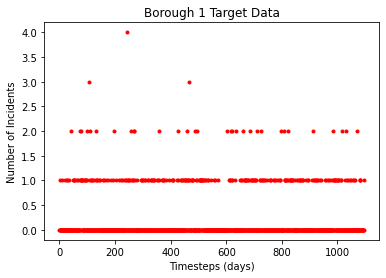

In [27]:
# extract data between start and end dates
t_start = pd.DatetimeIndex([start]).astype(np.int64)/1000000000
print(t_start)
t_end = pd.DatetimeIndex([end]).astype(np.int64)/1000000000
print(t_end)
#t = np.extract([(t_full>=t_start) & (t_full<=t_end)], t_full)
t = []
y = []
counts = df.iloc[:,1]
#print(counts)
print(len(t_full))
print(t_full[0])
for i in range(len(t_full)):
    if t_full[i]>=t_start and t_full[i]<=t_end:
        days = (t_full[i]-t_full[0])/(60*60*24)
        t.append(days)
        y.append(counts[i])
#t = np.extract([(t_full>=t_start) & (t_full<=t_end)], t_full)
#print(t)
#print(y)
y_size = len(y)
print(y_size)
# t=(t  - t[0])/60/60/24 # convert timestamp to days
# y = np.extract([(t_full>=t_start) & (t_full<=t_end)], df.iloc[:,1]).astype(np.int64)
# #plot extracted data
plt.scatter(t,y, color='red', marker='.')
plt.title(str('Borough 1 Target Data'))
plt.xlabel('Timesteps (days)'); plt.ylabel('Number of Incidents')
plt.show()

In [36]:
from sklearn.metrics import accuracy_score
def test_preds(q,dd,lag,plot,t,y,y_size, ID):
    #q−step ahead prediction
    stride=1
    XX=y[0:y_size - q - lag*dd:stride]
    # print('XX',type(XX[0]))
    # print('XX',XX)
    # print('XX',XX[0])
    for i in range(1,lag):
        X=y[i*dd:y_size - q - (lag - i)*dd:stride]
        XX=np.column_stack((XX,X))
    yy=y[lag*dd+q::stride]; tt=t[lag*dd+q::stride]
    XX = np.array(XX, dtype=np.int64)
    yy = np.array(yy, dtype=np.int64)
    tt = np.array(tt, dtype=np.int64)
    #XX.astype(int); yy.astype(int); tt.astype(int);
    yy_size = len(yy)
    #print('yy',type(yy[0]))
    #print('yy',yy[0])
    from sklearn.model_selection import train_test_split
    train, test = train_test_split(np.arange(0,yy_size),test_size=0.2)
    #print('train',train) 
    #print('test',type(test))
    from sklearn.linear_model import Ridge
    model = Ridge(fit_intercept=False).fit(XX[train], yy[train])
    print(model.intercept_)
    print(model.coef_)
    #print(model.coef_[0])
    if plot:
        y_pred = model.predict(XX)
        new_pred = np.zeros(len(y_pred))
        from math import isclose
        coefs = model.coef_
        print(sum(coefs))
        for i in range(len(y_pred)):
            if y_pred[i]==0 or isclose(y_pred[i],coefs[0],rel_tol=1e-05) or isclose(y_pred[i],coefs[1],rel_tol=1e-05):
                new_pred[i] = 0
                #print('value was coef 1 or 0')
            elif isclose(y_pred[i],coefs[2],rel_tol=1e-05):
                new_pred[i] = 1
                #print('value was coef 3')
            elif y_pred[i] > (sum(coefs)):
                new_pred[i] = 2
                if y_pred[i] > (sum(coefs)+.5*(sum(coefs))):
                    new_pred[i] = 3
            elif y_pred[i] > (coefs[0]+coefs[2]) or y_pred[i] > (coefs[1]+coefs[2]):
                new_pred[i] = 1
            else: 
                new_pred[i] = 0 
                # new_pred[i] = y_pred[i]
                # print(new_pred[i])
        # print(len(y_pred),len(new_pred))
        # print('yy vs y_pred 0 count vs new pred count: ', len(yy[yy==0]),len(y_pred[y_pred==0]), len(new_pred[new_pred==0]))
        # print('yy vs 1 new pred count: ', len(yy[yy==1]), len(new_pred[new_pred==1]))
        # print('count of 2s', len(yy[yy==2]), len(new_pred[new_pred==2]))
        # tt_dates = []
        # t_dates = []
        # start_date = int(t_start)
        # #print(t)
        # for i in range(len(t)):
        #     #print(i)
        #     if i < tt[0]:
        #         t_dates.append(start_date + (t[i]*60*60*24))
        #     else:
        #         t_dates.append(start_date + (i*60*60*24))
        #         tt_dates.append(start_date + (i*60*60*24)) 
        # print( t_dates)
        # tt_dates = np.array(tt_dates)
        # t_dates = np.array(t_dates)
        # tt_date = pd.to_datetime((tt_dates)*1000000000)
        # t_date = pd.to_datetime((t_dates)*1000000000)
        diff = len(y)-len(y_pred)
        print(diff)
        print(len(y))
        y_temp = list(y)
        for i in range(diff):
            y_temp.pop(0)
        print(len(y))
        print('accuracy', accuracy_score(y_temp,new_pred))
        plt.scatter(t, y, color='black',marker='.'); plt.scatter(tt, new_pred, color='blue',marker='.')
        #plt.scatter(t_date, y, color='black',marker='.'); plt.scatter(tt_date, new_pred, color='blue',marker='.')
        #print(tt)
        print(len(t),len(tt))
        #plt.scatter(t, y, color='black'); plt.scatter(np.array(df.iloc[:,0]), new_pred, color='blue')
        plt.title(str('Borough ' + ID + ' Prediction Data'))
        plt.xlabel('Timesteps (days)'); plt.ylabel('Number of Incidents')
        plt.legend(['training data','predictions'],loc='upper right')
        day=math.floor(24*60*60/dt) # number of samples per day
        #plt.xlim(((lag*dd+q)/day,(lag*dd+q)/day+2))
        #plt.xlim(len(t))
        #plt.ylim(0,2)
        # print(y_pred)
        # print(new_pred)
        plt.show()
        
    return(accuracy_score(y_temp,new_pred))

0.0
[0.23997745 0.2351881  0.2515438 ]
0.7267093569377675
13
1096
1096
accuracy 0.24930747922437674
1096 1083


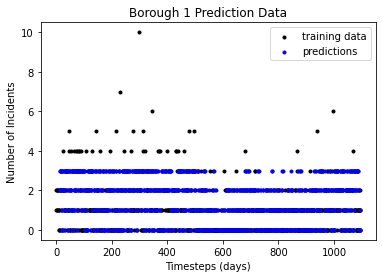

0.0
[0.27804991 0.1866895  0.25256878]
0.7173081945071054
4
1096
1096
accuracy 0.23992673992673993
1096 1092


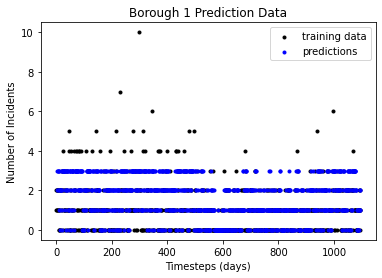

0.0
[0.21516373 0.26969308 0.2424572 ]
0.7273140045061758
28
1096
1096
accuracy 0.2565543071161049
1096 1068


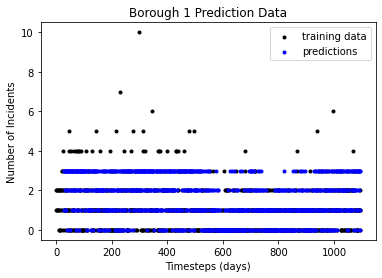

0.0
[0.190505   0.29061195 0.25293468]
0.7340516339045566
28
1096
1096
accuracy 0.25842696629213485
1096 1068


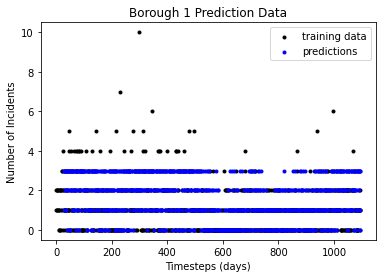

0.25842696629213485

In [49]:
# prediction using short−term trend
plot=True
test_preds(q=10,dd=1,lag=3,plot=plot,t=t,y=y, y_size=y_size , ID = '1')
# prediction using daily seasonality
d=math.floor(24*60*60/dt) # number of samples per day
test_preds(q=d,dd=d,lag=3,plot=plot,t=t,y=y, y_size=y_size, ID = '1')
# prediction using weekly seasonality
w=math.floor(7*24*60*60/dt) # number of samples per day
test_preds(q=w,dd=w,lag=3,plot=plot,t=t,y=y, y_size=y_size, ID = '1')
# prediction using monthly seasonality
w=math.floor(7*24*60*60/dt) # number of samples per day
test_preds(q=w,dd=w,lag=3,plot=plot,t=t,y=y, y_size=y_size, ID = '1')

Borough_1.csv


C:\Users\MATTHE~1\AppData\Local\Temp/ipykernel_27004/3724066679.py:16: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  t_full=pd.array(pd.DatetimeIndex(df.iloc[:,0]).astype(np.int64))/1000000000
C:\Users\MATTHE~1\AppData\Local\Temp/ipykernel_27004/3724066679.py:24: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  t_start = pd.DatetimeIndex([start]).astype(np.int64)/1000000000
C:\Users\MATTHE~1\AppData\Local\Temp/ipykernel_27004/3724066679.py:26: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  t_end = pd.DatetimeIndex([end]).astype(np.int64)/1000000000


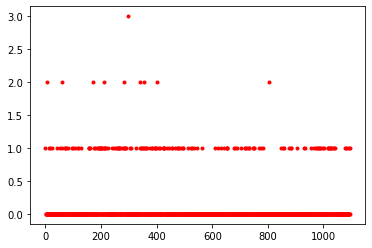

0.0
[0.10691693 0.14437518 0.13280549]
0.384097604454245
28
1096
1096
accuracy 0.7593632958801498
1096 1068


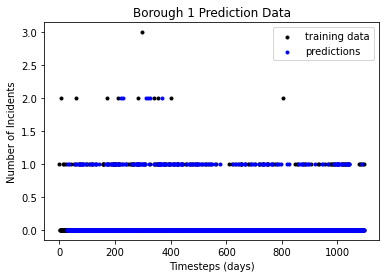

Borough_2.csv


C:\Users\MATTHE~1\AppData\Local\Temp/ipykernel_27004/3724066679.py:16: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  t_full=pd.array(pd.DatetimeIndex(df.iloc[:,0]).astype(np.int64))/1000000000
C:\Users\MATTHE~1\AppData\Local\Temp/ipykernel_27004/3724066679.py:24: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  t_start = pd.DatetimeIndex([start]).astype(np.int64)/1000000000
C:\Users\MATTHE~1\AppData\Local\Temp/ipykernel_27004/3724066679.py:26: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  t_end = pd.DatetimeIndex([end]).astype(np.int64)/1000000000


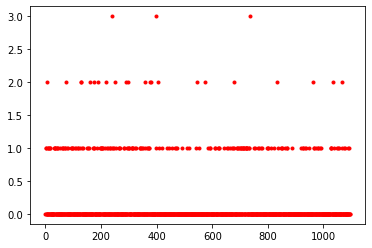

0.0
[0.13650916 0.1034378  0.13622577]
0.3761727381708341
28
1096
1096
accuracy 0.6947565543071161
1096 1068


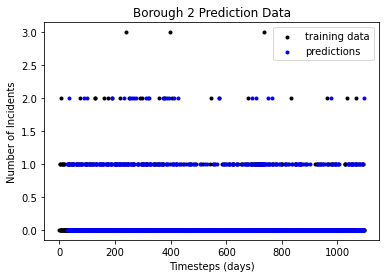

Borough_3.csv


C:\Users\MATTHE~1\AppData\Local\Temp/ipykernel_27004/3724066679.py:16: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  t_full=pd.array(pd.DatetimeIndex(df.iloc[:,0]).astype(np.int64))/1000000000
C:\Users\MATTHE~1\AppData\Local\Temp/ipykernel_27004/3724066679.py:24: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  t_start = pd.DatetimeIndex([start]).astype(np.int64)/1000000000
C:\Users\MATTHE~1\AppData\Local\Temp/ipykernel_27004/3724066679.py:26: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  t_end = pd.DatetimeIndex([end]).astype(np.int64)/1000000000


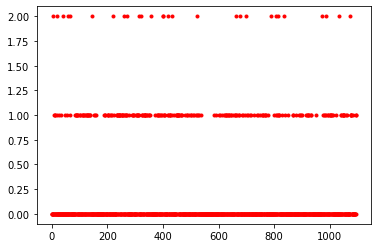

0.0
[0.11201745 0.15035502 0.19559547]
0.45796793611574715
28
1096
1096
accuracy 0.6685393258426966
1096 1068


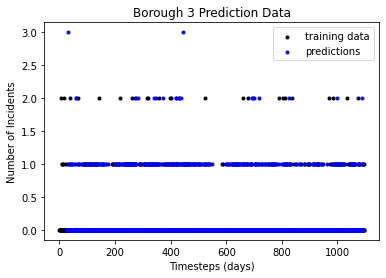

Borough_4.csv


C:\Users\MATTHE~1\AppData\Local\Temp/ipykernel_27004/3724066679.py:16: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  t_full=pd.array(pd.DatetimeIndex(df.iloc[:,0]).astype(np.int64))/1000000000
C:\Users\MATTHE~1\AppData\Local\Temp/ipykernel_27004/3724066679.py:24: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  t_start = pd.DatetimeIndex([start]).astype(np.int64)/1000000000
C:\Users\MATTHE~1\AppData\Local\Temp/ipykernel_27004/3724066679.py:26: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  t_end = pd.DatetimeIndex([end]).astype(np.int64)/1000000000


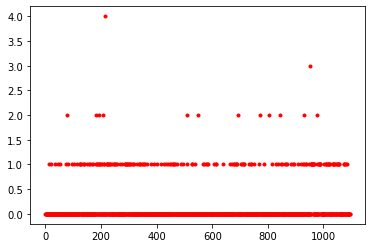

0.0
[0.1402896  0.13782471 0.09453051]
0.37264481197392363
28
1096
1096
accuracy 0.7088014981273408
1096 1068


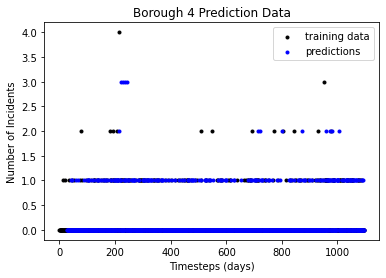

Borough_5.csv


C:\Users\MATTHE~1\AppData\Local\Temp/ipykernel_27004/3724066679.py:16: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  t_full=pd.array(pd.DatetimeIndex(df.iloc[:,0]).astype(np.int64))/1000000000
C:\Users\MATTHE~1\AppData\Local\Temp/ipykernel_27004/3724066679.py:24: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  t_start = pd.DatetimeIndex([start]).astype(np.int64)/1000000000
C:\Users\MATTHE~1\AppData\Local\Temp/ipykernel_27004/3724066679.py:26: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  t_end = pd.DatetimeIndex([end]).astype(np.int64)/1000000000


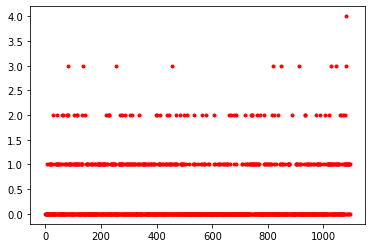

0.0
[0.19100137 0.17930252 0.20284051]
0.5731444035286895
28
1096
1096
accuracy 0.5430711610486891
1096 1068


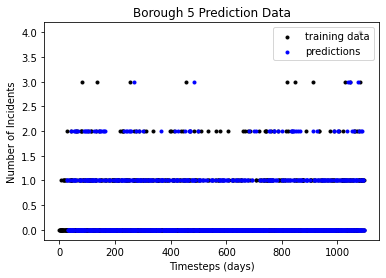

Borough_6.csv


C:\Users\MATTHE~1\AppData\Local\Temp/ipykernel_27004/3724066679.py:16: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  t_full=pd.array(pd.DatetimeIndex(df.iloc[:,0]).astype(np.int64))/1000000000
C:\Users\MATTHE~1\AppData\Local\Temp/ipykernel_27004/3724066679.py:24: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  t_start = pd.DatetimeIndex([start]).astype(np.int64)/1000000000
C:\Users\MATTHE~1\AppData\Local\Temp/ipykernel_27004/3724066679.py:26: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  t_end = pd.DatetimeIndex([end]).astype(np.int64)/1000000000


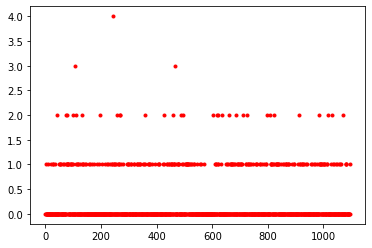

0.0
[0.13889554 0.09437896 0.11410549]
0.3473799891970047
28
1096
1096
accuracy 0.598314606741573
1096 1068


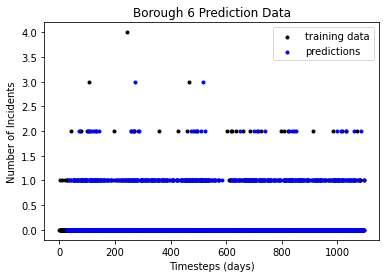

Borough_7.csv


C:\Users\MATTHE~1\AppData\Local\Temp/ipykernel_27004/3724066679.py:16: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  t_full=pd.array(pd.DatetimeIndex(df.iloc[:,0]).astype(np.int64))/1000000000
C:\Users\MATTHE~1\AppData\Local\Temp/ipykernel_27004/3724066679.py:24: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  t_start = pd.DatetimeIndex([start]).astype(np.int64)/1000000000
C:\Users\MATTHE~1\AppData\Local\Temp/ipykernel_27004/3724066679.py:26: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  t_end = pd.DatetimeIndex([end]).astype(np.int64)/1000000000


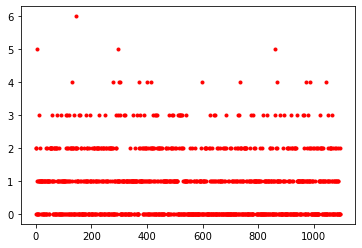

0.0
[0.18961122 0.23912357 0.26546215]
0.6941969396417262
28
1096
1096
accuracy 0.30243445692883897
1096 1068


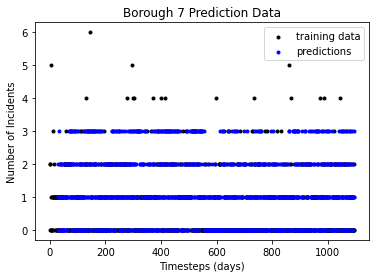

Borough_8.csv


C:\Users\MATTHE~1\AppData\Local\Temp/ipykernel_27004/3724066679.py:16: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  t_full=pd.array(pd.DatetimeIndex(df.iloc[:,0]).astype(np.int64))/1000000000
C:\Users\MATTHE~1\AppData\Local\Temp/ipykernel_27004/3724066679.py:24: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  t_start = pd.DatetimeIndex([start]).astype(np.int64)/1000000000
C:\Users\MATTHE~1\AppData\Local\Temp/ipykernel_27004/3724066679.py:26: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  t_end = pd.DatetimeIndex([end]).astype(np.int64)/1000000000


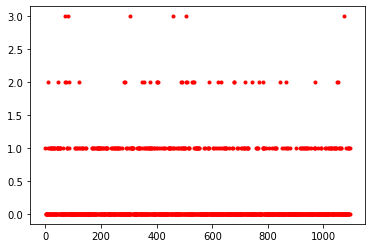

0.0
[0.15911195 0.11188706 0.18645525]
0.45745426633617137
28
1096
1096
accuracy 0.6142322097378277
1096 1068


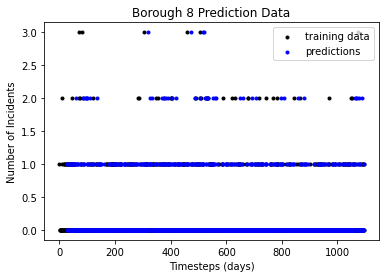

Borough_9.csv


C:\Users\MATTHE~1\AppData\Local\Temp/ipykernel_27004/3724066679.py:16: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  t_full=pd.array(pd.DatetimeIndex(df.iloc[:,0]).astype(np.int64))/1000000000
C:\Users\MATTHE~1\AppData\Local\Temp/ipykernel_27004/3724066679.py:24: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  t_start = pd.DatetimeIndex([start]).astype(np.int64)/1000000000
C:\Users\MATTHE~1\AppData\Local\Temp/ipykernel_27004/3724066679.py:26: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  t_end = pd.DatetimeIndex([end]).astype(np.int64)/1000000000


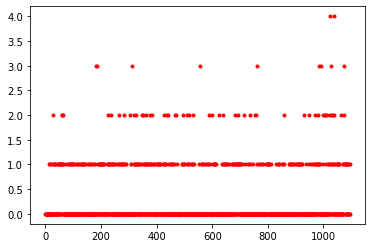

0.0
[0.15069836 0.1354735  0.18999256]
0.4761644178920431
28
1096
1096
accuracy 0.5561797752808989
1096 1068


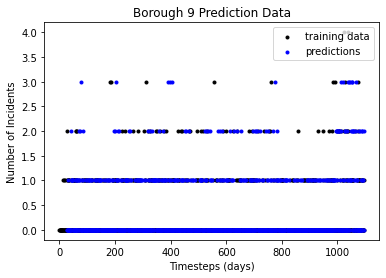

Borough_10.csv


C:\Users\MATTHE~1\AppData\Local\Temp/ipykernel_27004/3724066679.py:16: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  t_full=pd.array(pd.DatetimeIndex(df.iloc[:,0]).astype(np.int64))/1000000000
C:\Users\MATTHE~1\AppData\Local\Temp/ipykernel_27004/3724066679.py:24: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  t_start = pd.DatetimeIndex([start]).astype(np.int64)/1000000000
C:\Users\MATTHE~1\AppData\Local\Temp/ipykernel_27004/3724066679.py:26: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  t_end = pd.DatetimeIndex([end]).astype(np.int64)/1000000000


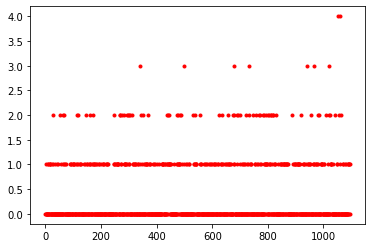

0.0
[0.20584447 0.17661344 0.13709196]
0.5195498644109354
28
1096
1096
accuracy 0.4934456928838951
1096 1068


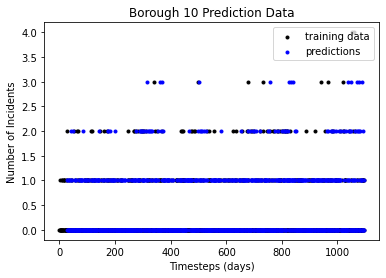

Borough_11.csv


C:\Users\MATTHE~1\AppData\Local\Temp/ipykernel_27004/3724066679.py:16: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  t_full=pd.array(pd.DatetimeIndex(df.iloc[:,0]).astype(np.int64))/1000000000
C:\Users\MATTHE~1\AppData\Local\Temp/ipykernel_27004/3724066679.py:24: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  t_start = pd.DatetimeIndex([start]).astype(np.int64)/1000000000
C:\Users\MATTHE~1\AppData\Local\Temp/ipykernel_27004/3724066679.py:26: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  t_end = pd.DatetimeIndex([end]).astype(np.int64)/1000000000


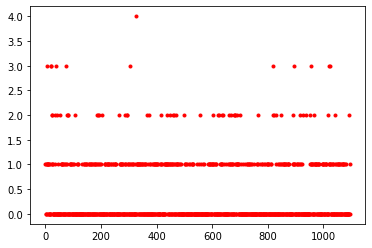

0.0
[0.1495111  0.20756754 0.1837915 ]
0.5408701403353849
28
1096
1096
accuracy 0.4887640449438202
1096 1068


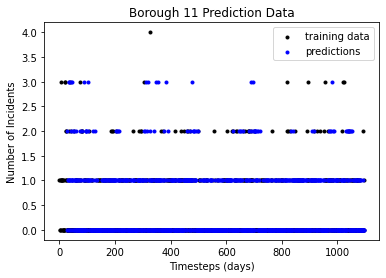

Borough_12.csv


C:\Users\MATTHE~1\AppData\Local\Temp/ipykernel_27004/3724066679.py:16: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  t_full=pd.array(pd.DatetimeIndex(df.iloc[:,0]).astype(np.int64))/1000000000
C:\Users\MATTHE~1\AppData\Local\Temp/ipykernel_27004/3724066679.py:24: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  t_start = pd.DatetimeIndex([start]).astype(np.int64)/1000000000
C:\Users\MATTHE~1\AppData\Local\Temp/ipykernel_27004/3724066679.py:26: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  t_end = pd.DatetimeIndex([end]).astype(np.int64)/1000000000


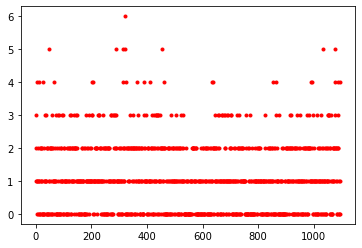

0.0
[0.20153552 0.30011774 0.26149806]
0.7631513167775157
28
1096
1096
accuracy 0.23782771535580524
1096 1068


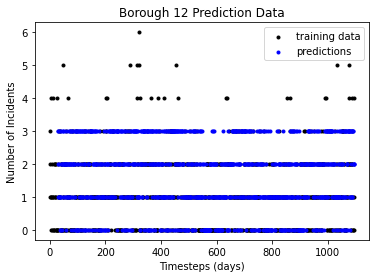

Borough_13.csv


C:\Users\MATTHE~1\AppData\Local\Temp/ipykernel_27004/3724066679.py:16: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  t_full=pd.array(pd.DatetimeIndex(df.iloc[:,0]).astype(np.int64))/1000000000
C:\Users\MATTHE~1\AppData\Local\Temp/ipykernel_27004/3724066679.py:24: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  t_start = pd.DatetimeIndex([start]).astype(np.int64)/1000000000
C:\Users\MATTHE~1\AppData\Local\Temp/ipykernel_27004/3724066679.py:26: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  t_end = pd.DatetimeIndex([end]).astype(np.int64)/1000000000


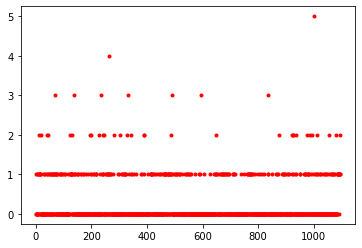

0.0
[0.17095621 0.11093165 0.19808128]
0.4799691282778157
28
1096
1096
accuracy 0.6245318352059925
1096 1068


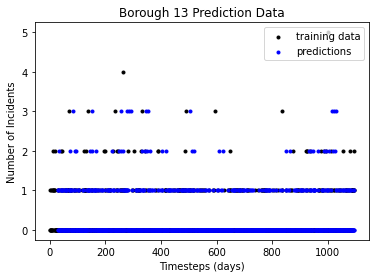

Borough_14.csv


C:\Users\MATTHE~1\AppData\Local\Temp/ipykernel_27004/3724066679.py:16: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  t_full=pd.array(pd.DatetimeIndex(df.iloc[:,0]).astype(np.int64))/1000000000
C:\Users\MATTHE~1\AppData\Local\Temp/ipykernel_27004/3724066679.py:24: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  t_start = pd.DatetimeIndex([start]).astype(np.int64)/1000000000
C:\Users\MATTHE~1\AppData\Local\Temp/ipykernel_27004/3724066679.py:26: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  t_end = pd.DatetimeIndex([end]).astype(np.int64)/1000000000


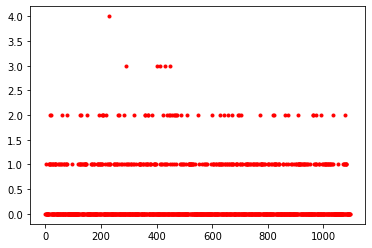

0.0
[0.20064767 0.17264133 0.17967451]
0.552963505842091
28
1096
1096
accuracy 0.5252808988764045
1096 1068


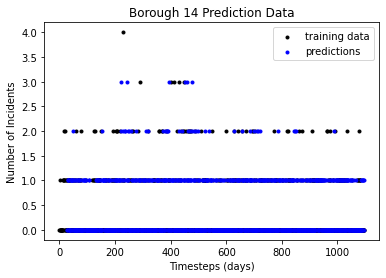

Borough_15.csv


C:\Users\MATTHE~1\AppData\Local\Temp/ipykernel_27004/3724066679.py:16: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  t_full=pd.array(pd.DatetimeIndex(df.iloc[:,0]).astype(np.int64))/1000000000
C:\Users\MATTHE~1\AppData\Local\Temp/ipykernel_27004/3724066679.py:24: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  t_start = pd.DatetimeIndex([start]).astype(np.int64)/1000000000
C:\Users\MATTHE~1\AppData\Local\Temp/ipykernel_27004/3724066679.py:26: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  t_end = pd.DatetimeIndex([end]).astype(np.int64)/1000000000


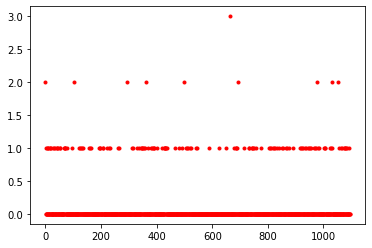

0.0
[0.09237809 0.15974385 0.05092738]
0.30304932329465734
28
1096
1096
accuracy 0.7687265917602997
1096 1068


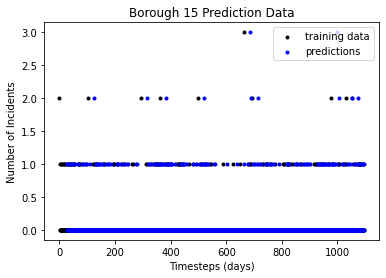

Borough_16.csv


C:\Users\MATTHE~1\AppData\Local\Temp/ipykernel_27004/3724066679.py:16: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  t_full=pd.array(pd.DatetimeIndex(df.iloc[:,0]).astype(np.int64))/1000000000
C:\Users\MATTHE~1\AppData\Local\Temp/ipykernel_27004/3724066679.py:24: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  t_start = pd.DatetimeIndex([start]).astype(np.int64)/1000000000
C:\Users\MATTHE~1\AppData\Local\Temp/ipykernel_27004/3724066679.py:26: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  t_end = pd.DatetimeIndex([end]).astype(np.int64)/1000000000


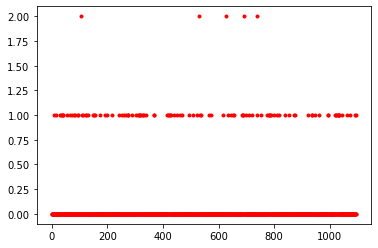

0.0
[0.03835634 0.0598886  0.08723307]
0.1854780118808496
28
1096
1096
accuracy 0.8314606741573034
1096 1068


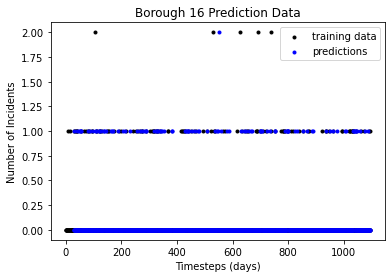

Borough_17.csv


C:\Users\MATTHE~1\AppData\Local\Temp/ipykernel_27004/3724066679.py:16: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  t_full=pd.array(pd.DatetimeIndex(df.iloc[:,0]).astype(np.int64))/1000000000
C:\Users\MATTHE~1\AppData\Local\Temp/ipykernel_27004/3724066679.py:24: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  t_start = pd.DatetimeIndex([start]).astype(np.int64)/1000000000
C:\Users\MATTHE~1\AppData\Local\Temp/ipykernel_27004/3724066679.py:26: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  t_end = pd.DatetimeIndex([end]).astype(np.int64)/1000000000


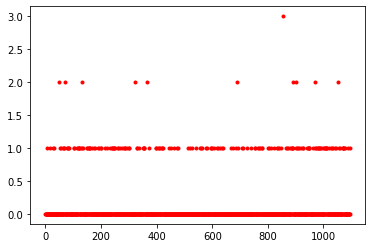

0.0
[0.09632398 0.15689034 0.16498771]
0.4182020319232104
28
1096
1096
accuracy 0.7406367041198502
1096 1068


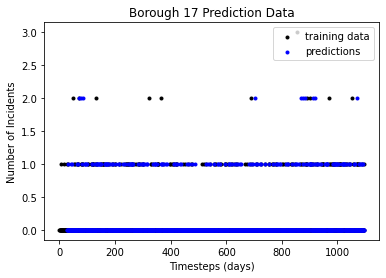

Borough_18.csv


C:\Users\MATTHE~1\AppData\Local\Temp/ipykernel_27004/3724066679.py:16: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  t_full=pd.array(pd.DatetimeIndex(df.iloc[:,0]).astype(np.int64))/1000000000
C:\Users\MATTHE~1\AppData\Local\Temp/ipykernel_27004/3724066679.py:24: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  t_start = pd.DatetimeIndex([start]).astype(np.int64)/1000000000
C:\Users\MATTHE~1\AppData\Local\Temp/ipykernel_27004/3724066679.py:26: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  t_end = pd.DatetimeIndex([end]).astype(np.int64)/1000000000


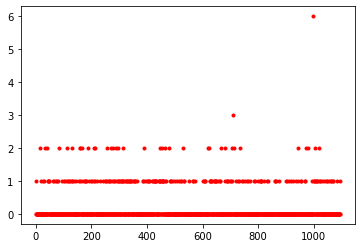

0.0
[0.13981697 0.19008576 0.1675205 ]
0.4974232360405056
28
1096
1096
accuracy 0.6367041198501873
1096 1068


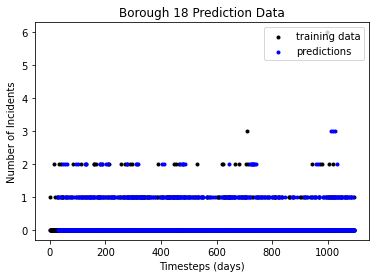

Borough_19.csv


C:\Users\MATTHE~1\AppData\Local\Temp/ipykernel_27004/3724066679.py:16: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  t_full=pd.array(pd.DatetimeIndex(df.iloc[:,0]).astype(np.int64))/1000000000
C:\Users\MATTHE~1\AppData\Local\Temp/ipykernel_27004/3724066679.py:24: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  t_start = pd.DatetimeIndex([start]).astype(np.int64)/1000000000
C:\Users\MATTHE~1\AppData\Local\Temp/ipykernel_27004/3724066679.py:26: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  t_end = pd.DatetimeIndex([end]).astype(np.int64)/1000000000


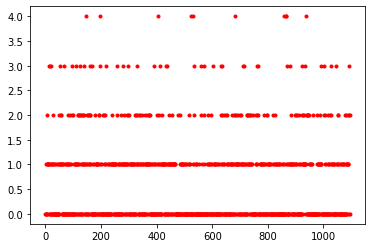

0.0
[0.21166221 0.21787    0.22621699]
0.6557491938261243
28
1096
1096
accuracy 0.3661048689138577
1096 1068


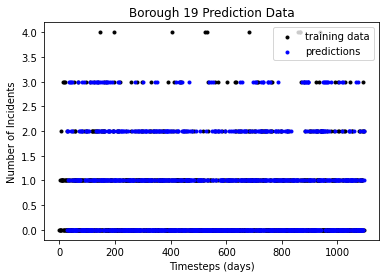

Borough_20.csv


C:\Users\MATTHE~1\AppData\Local\Temp/ipykernel_27004/3724066679.py:16: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  t_full=pd.array(pd.DatetimeIndex(df.iloc[:,0]).astype(np.int64))/1000000000
C:\Users\MATTHE~1\AppData\Local\Temp/ipykernel_27004/3724066679.py:24: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  t_start = pd.DatetimeIndex([start]).astype(np.int64)/1000000000
C:\Users\MATTHE~1\AppData\Local\Temp/ipykernel_27004/3724066679.py:26: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  t_end = pd.DatetimeIndex([end]).astype(np.int64)/1000000000


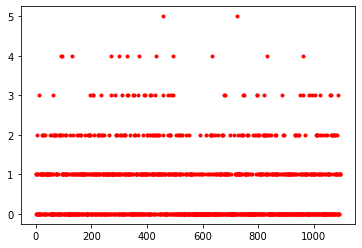

0.0
[0.26656864 0.23005468 0.18361598]
0.6802392991117805
28
1096
1096
accuracy 0.3389513108614232
1096 1068


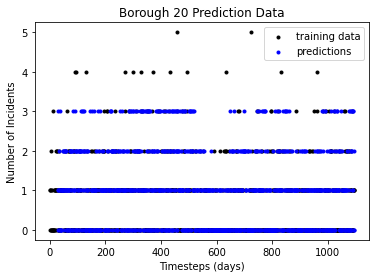

Borough_21.csv


C:\Users\MATTHE~1\AppData\Local\Temp/ipykernel_27004/3724066679.py:16: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  t_full=pd.array(pd.DatetimeIndex(df.iloc[:,0]).astype(np.int64))/1000000000
C:\Users\MATTHE~1\AppData\Local\Temp/ipykernel_27004/3724066679.py:24: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  t_start = pd.DatetimeIndex([start]).astype(np.int64)/1000000000
C:\Users\MATTHE~1\AppData\Local\Temp/ipykernel_27004/3724066679.py:26: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  t_end = pd.DatetimeIndex([end]).astype(np.int64)/1000000000


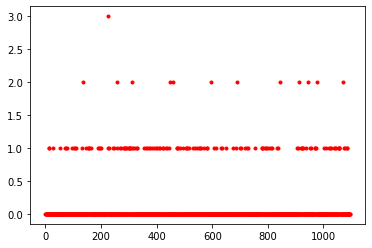

0.0
[0.06066288 0.10233317 0.07624548]
0.23924153638204693
28
1096
1096
accuracy 0.7593632958801498
1096 1068


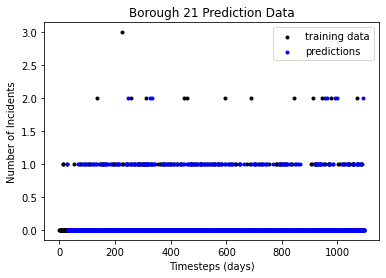

Borough_22.csv


C:\Users\MATTHE~1\AppData\Local\Temp/ipykernel_27004/3724066679.py:16: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  t_full=pd.array(pd.DatetimeIndex(df.iloc[:,0]).astype(np.int64))/1000000000
C:\Users\MATTHE~1\AppData\Local\Temp/ipykernel_27004/3724066679.py:24: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  t_start = pd.DatetimeIndex([start]).astype(np.int64)/1000000000
C:\Users\MATTHE~1\AppData\Local\Temp/ipykernel_27004/3724066679.py:26: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  t_end = pd.DatetimeIndex([end]).astype(np.int64)/1000000000


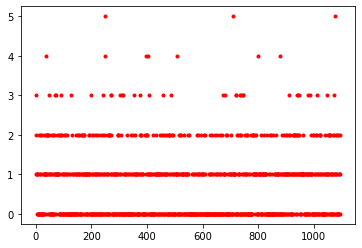

0.0
[0.20909578 0.28327656 0.1912919 ]
0.6836642330858964
28
1096
1096
accuracy 0.34737827715355807
1096 1068


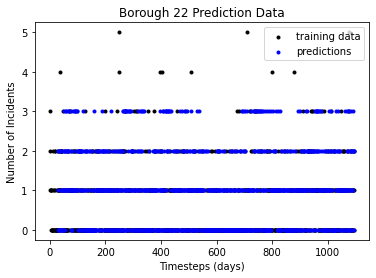

Borough_23.csv


C:\Users\MATTHE~1\AppData\Local\Temp/ipykernel_27004/3724066679.py:16: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  t_full=pd.array(pd.DatetimeIndex(df.iloc[:,0]).astype(np.int64))/1000000000
C:\Users\MATTHE~1\AppData\Local\Temp/ipykernel_27004/3724066679.py:24: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  t_start = pd.DatetimeIndex([start]).astype(np.int64)/1000000000
C:\Users\MATTHE~1\AppData\Local\Temp/ipykernel_27004/3724066679.py:26: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  t_end = pd.DatetimeIndex([end]).astype(np.int64)/1000000000


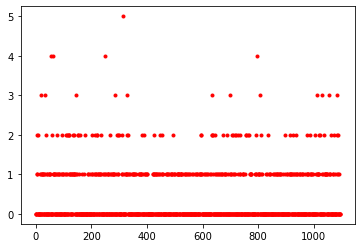

0.0
[0.19744035 0.13571822 0.1925478 ]
0.5257063659742571
28
1096
1096
accuracy 0.4850187265917603
1096 1068


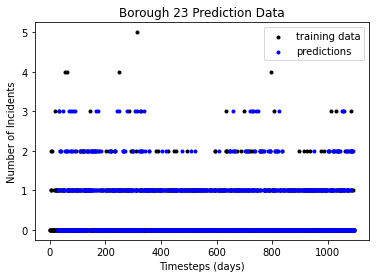

Borough_24.csv


C:\Users\MATTHE~1\AppData\Local\Temp/ipykernel_27004/3724066679.py:16: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  t_full=pd.array(pd.DatetimeIndex(df.iloc[:,0]).astype(np.int64))/1000000000
C:\Users\MATTHE~1\AppData\Local\Temp/ipykernel_27004/3724066679.py:24: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  t_start = pd.DatetimeIndex([start]).astype(np.int64)/1000000000
C:\Users\MATTHE~1\AppData\Local\Temp/ipykernel_27004/3724066679.py:26: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  t_end = pd.DatetimeIndex([end]).astype(np.int64)/1000000000


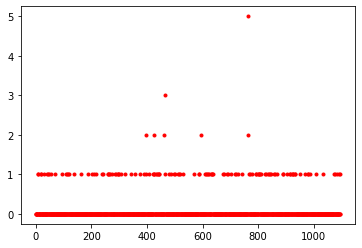

0.0
[0.09880729 0.11565137 0.05501167]
0.2694703361752882
28
1096
1096
accuracy 0.7949438202247191
1096 1068


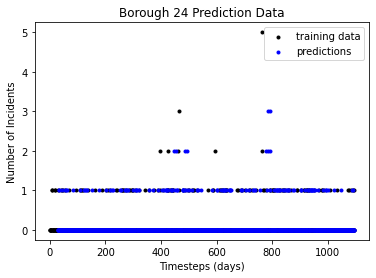

Borough_25.csv


C:\Users\MATTHE~1\AppData\Local\Temp/ipykernel_27004/3724066679.py:16: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  t_full=pd.array(pd.DatetimeIndex(df.iloc[:,0]).astype(np.int64))/1000000000
C:\Users\MATTHE~1\AppData\Local\Temp/ipykernel_27004/3724066679.py:24: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  t_start = pd.DatetimeIndex([start]).astype(np.int64)/1000000000
C:\Users\MATTHE~1\AppData\Local\Temp/ipykernel_27004/3724066679.py:26: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  t_end = pd.DatetimeIndex([end]).astype(np.int64)/1000000000


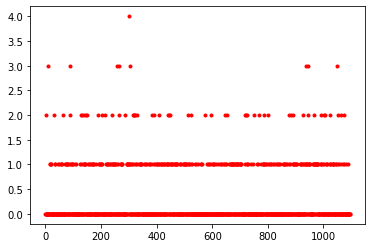

0.0
[0.19745251 0.21278552 0.17131993]
0.5815579601390878
28
1096
1096
accuracy 0.5318352059925093
1096 1068


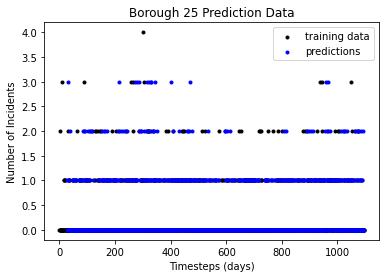

Borough_26.csv


C:\Users\MATTHE~1\AppData\Local\Temp/ipykernel_27004/3724066679.py:16: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  t_full=pd.array(pd.DatetimeIndex(df.iloc[:,0]).astype(np.int64))/1000000000
C:\Users\MATTHE~1\AppData\Local\Temp/ipykernel_27004/3724066679.py:24: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  t_start = pd.DatetimeIndex([start]).astype(np.int64)/1000000000
C:\Users\MATTHE~1\AppData\Local\Temp/ipykernel_27004/3724066679.py:26: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  t_end = pd.DatetimeIndex([end]).astype(np.int64)/1000000000


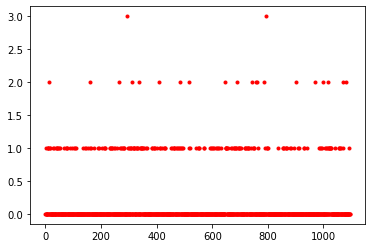

0.0
[0.15575166 0.0723294  0.10337977]
0.33146083056721165
28
1096
1096
accuracy 0.6694756554307116
1096 1068


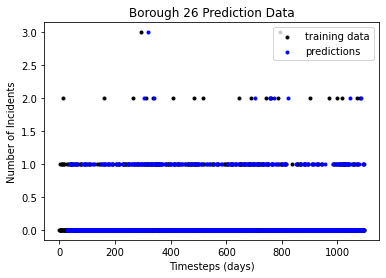

Borough_27.csv


C:\Users\MATTHE~1\AppData\Local\Temp/ipykernel_27004/3724066679.py:16: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  t_full=pd.array(pd.DatetimeIndex(df.iloc[:,0]).astype(np.int64))/1000000000
C:\Users\MATTHE~1\AppData\Local\Temp/ipykernel_27004/3724066679.py:24: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  t_start = pd.DatetimeIndex([start]).astype(np.int64)/1000000000
C:\Users\MATTHE~1\AppData\Local\Temp/ipykernel_27004/3724066679.py:26: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  t_end = pd.DatetimeIndex([end]).astype(np.int64)/1000000000


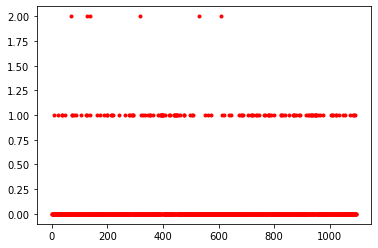

0.0
[0.06595871 0.05158951 0.14206884]
0.25961705825915754
28
1096
1096
accuracy 0.8108614232209738
1096 1068


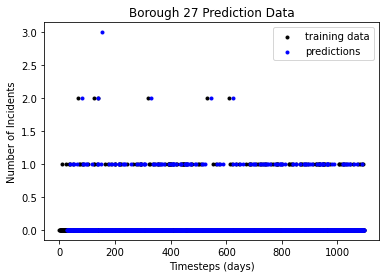

Borough_28.csv


C:\Users\MATTHE~1\AppData\Local\Temp/ipykernel_27004/3724066679.py:16: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  t_full=pd.array(pd.DatetimeIndex(df.iloc[:,0]).astype(np.int64))/1000000000
C:\Users\MATTHE~1\AppData\Local\Temp/ipykernel_27004/3724066679.py:24: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  t_start = pd.DatetimeIndex([start]).astype(np.int64)/1000000000
C:\Users\MATTHE~1\AppData\Local\Temp/ipykernel_27004/3724066679.py:26: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  t_end = pd.DatetimeIndex([end]).astype(np.int64)/1000000000


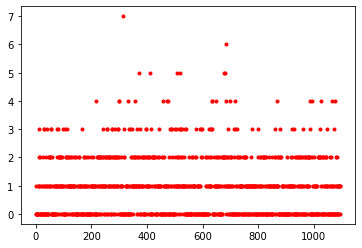

0.0
[0.27073386 0.20350121 0.25726845]
0.7315035198132911
28
1096
1096
accuracy 0.2649812734082397
1096 1068


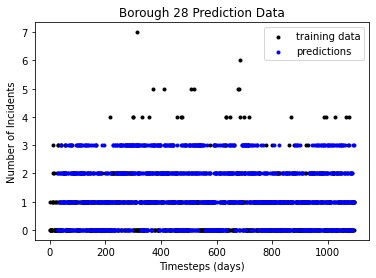

Borough_29.csv


C:\Users\MATTHE~1\AppData\Local\Temp/ipykernel_27004/3724066679.py:16: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  t_full=pd.array(pd.DatetimeIndex(df.iloc[:,0]).astype(np.int64))/1000000000
C:\Users\MATTHE~1\AppData\Local\Temp/ipykernel_27004/3724066679.py:24: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  t_start = pd.DatetimeIndex([start]).astype(np.int64)/1000000000
C:\Users\MATTHE~1\AppData\Local\Temp/ipykernel_27004/3724066679.py:26: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  t_end = pd.DatetimeIndex([end]).astype(np.int64)/1000000000


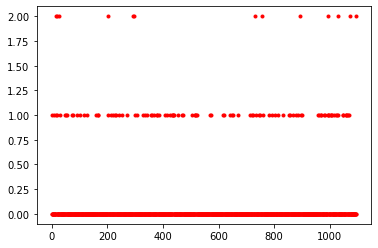

0.0
[0.06054474 0.07500808 0.06772338]
0.20327620319275075
28
1096
1096
accuracy 0.799625468164794
1096 1068


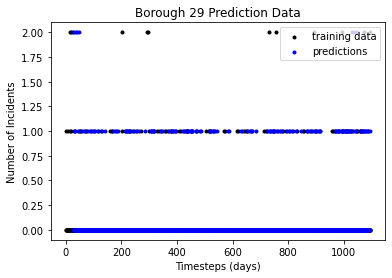

Borough_30.csv


C:\Users\MATTHE~1\AppData\Local\Temp/ipykernel_27004/3724066679.py:16: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  t_full=pd.array(pd.DatetimeIndex(df.iloc[:,0]).astype(np.int64))/1000000000
C:\Users\MATTHE~1\AppData\Local\Temp/ipykernel_27004/3724066679.py:24: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  t_start = pd.DatetimeIndex([start]).astype(np.int64)/1000000000
C:\Users\MATTHE~1\AppData\Local\Temp/ipykernel_27004/3724066679.py:26: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  t_end = pd.DatetimeIndex([end]).astype(np.int64)/1000000000


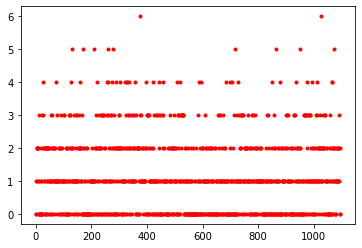

0.0
[0.23563352 0.26183168 0.27427681]
0.7717420100249428
28
1096
1096
accuracy 0.22752808988764045
1096 1068


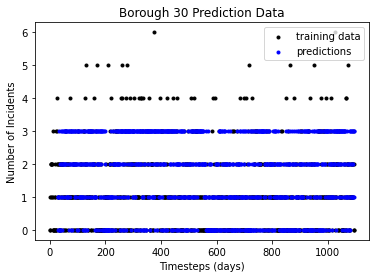

Borough_31.csv


C:\Users\MATTHE~1\AppData\Local\Temp/ipykernel_27004/3724066679.py:16: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  t_full=pd.array(pd.DatetimeIndex(df.iloc[:,0]).astype(np.int64))/1000000000
C:\Users\MATTHE~1\AppData\Local\Temp/ipykernel_27004/3724066679.py:24: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  t_start = pd.DatetimeIndex([start]).astype(np.int64)/1000000000
C:\Users\MATTHE~1\AppData\Local\Temp/ipykernel_27004/3724066679.py:26: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  t_end = pd.DatetimeIndex([end]).astype(np.int64)/1000000000


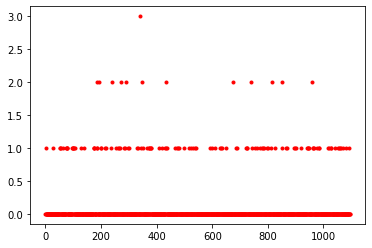

0.0
[0.05408154 0.06120067 0.11057201]
0.22585422341376526
28
1096
1096
accuracy 0.795880149812734
1096 1068


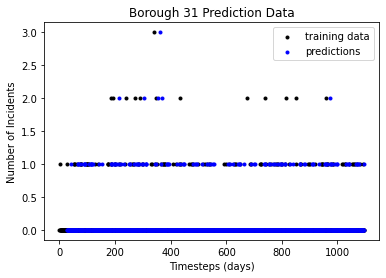

Borough_32.csv


C:\Users\MATTHE~1\AppData\Local\Temp/ipykernel_27004/3724066679.py:16: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  t_full=pd.array(pd.DatetimeIndex(df.iloc[:,0]).astype(np.int64))/1000000000
C:\Users\MATTHE~1\AppData\Local\Temp/ipykernel_27004/3724066679.py:24: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  t_start = pd.DatetimeIndex([start]).astype(np.int64)/1000000000
C:\Users\MATTHE~1\AppData\Local\Temp/ipykernel_27004/3724066679.py:26: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  t_end = pd.DatetimeIndex([end]).astype(np.int64)/1000000000


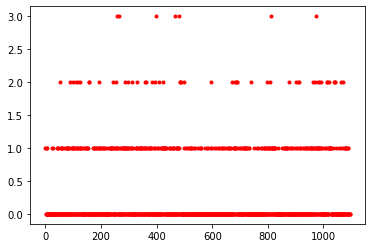

0.0
[0.2274742  0.18640675 0.13373611]
0.5476170572327642
28
1096
1096
accuracy 0.5299625468164794
1096 1068


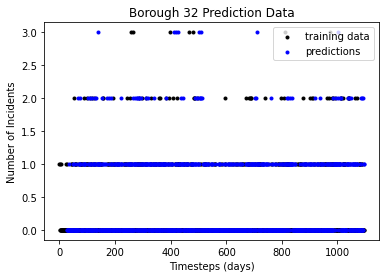

Borough_33.csv


C:\Users\MATTHE~1\AppData\Local\Temp/ipykernel_27004/3724066679.py:16: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  t_full=pd.array(pd.DatetimeIndex(df.iloc[:,0]).astype(np.int64))/1000000000
C:\Users\MATTHE~1\AppData\Local\Temp/ipykernel_27004/3724066679.py:24: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  t_start = pd.DatetimeIndex([start]).astype(np.int64)/1000000000
C:\Users\MATTHE~1\AppData\Local\Temp/ipykernel_27004/3724066679.py:26: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  t_end = pd.DatetimeIndex([end]).astype(np.int64)/1000000000


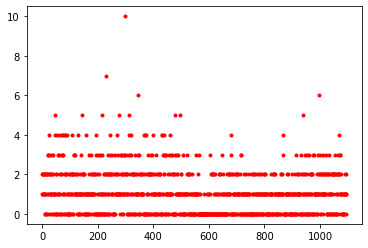

0.0
[0.2075273  0.24842778 0.23178718]
0.6877422575402903
28
1096
1096
accuracy 0.2565543071161049
1096 1068


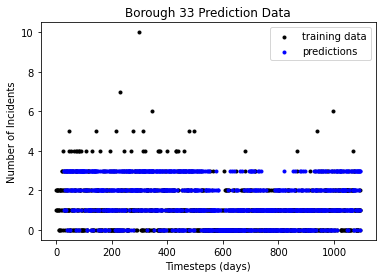

['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33'] [0.7594, 0.6948, 0.6685, 0.7088, 0.5431, 0.5983, 0.3024, 0.6142, 0.5562, 0.4934, 0.4888, 0.2378, 0.6245, 0.5253, 0.7687, 0.8315, 0.7406, 0.6367, 0.3661, 0.339, 0.7594, 0.3474, 0.485, 0.7949, 0.5318, 0.6695, 0.8109, 0.265, 0.7996, 0.2275, 0.7959, 0.53, 0.2566]


TypeError: list expected at most 1 argument, got 2

In [44]:
path = 'C:\\Users\\Matthew Lynch\\Desktop\\Machine Learning\\GroupStuff\\ML_group_project_2\\Separated_Incidents'
plot = True
#for i in range(1,34):
#DataF = np.ndarray()
IDs = []
accuracies = []
for i in range(1,34):
    ID = str(i)
    filename = str('Borough_'+ID+'.csv')
    print(filename)
    pathNew = str(path+'\\'+filename)
    df = pd.read_csv(pathNew)
    start=pd.to_datetime('2018-10-01',format='%Y-%m-%d')
    end=pd.to_datetime('2021-09-30',format='%Y-%m-%d')
    # convert date/time to unix timestamp in sec
    t_full=pd.array(pd.DatetimeIndex(df.iloc[:,0]).astype(np.int64))/1000000000
    dt = t_full[1] - t_full[0]
    #dt_day = dt/(60*60*24)
    #print('data sampling interval is %d secs'%dt)
    #print('data sampling interval is %d days'%dt_day)

    
    # extract data between start and end dates
    t_start = pd.DatetimeIndex([start]).astype(np.int64)/1000000000
    #print(t_start)
    t_end = pd.DatetimeIndex([end]).astype(np.int64)/1000000000
    #print(t_end)
    #t = np.extract([(t_full>=t_start) & (t_full<=t_end)], t_full)
    t = []
    y = []
    counts = df.iloc[:,1]
    #print(counts)
    #print(len(t_full))
    #print(t_full[0])
    for i in range(len(t_full)):
        if t_full[i]>=t_start and t_full[i]<=t_end:
            days = (t_full[i]-t_full[0])/(60*60*24)
            t.append(days)
            y.append(counts[i])
    #t = np.extract([(t_full>=t_start) & (t_full<=t_end)], t_full)
    #print(t)
    #print(y)
    y_size = len(y)
    #print(y_size)
    # t=(t  - t[0])/60/60/24 # convert timestamp to days
    # y = np.extract([(t_full>=t_start) & (t_full<=t_end)], df.iloc[:,1]).astype(np.int64)
    # #plot extracted data
    plt.scatter(t,y, color='red', marker='.'); plt.show()
    
    w=math.floor(7*24*60*60/dt) # number of samples per day
    accuracy = test_preds(q=w,dd=w,lag=3,plot=plot,t=t,y=y, y_size=y_size, ID = ID)
    #DataF.append(DataF, [ID, accuracy])
    IDs.append(ID)
    accuracies.append(round(accuracy,4))
print(IDs, accuracies)
op = np.column_stack((IDs,accuracies))
opDF = pd.DataFrame(op, columns=list('BoroughID','Accuracy'))
print(op, opDF)

[0 0 0 ... 0 0 1]
[[1 0 0 ... 0 1 0]
 [0 0 0 ... 1 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 0 1 0]
 [0 0 1 ... 1 0 0]
 [0 0 0 ... 0 0 0]]
0.0 [0.03921313 0.03792366 0.07820989 0.03921313 0.10845853 0.10292491
 0.04832044 0.1331033  0.07418663]


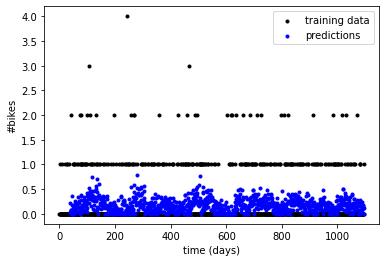

In [65]:
#putting it together
q=10
lag=3; stride=1
w=math.floor(7*24*60*60/dt) # number of samples per week
length = y_size - w - lag*w -q
XX=y[q:q+length:stride]
for i in range(1,lag):
    X=y[i*w+q:i*w+q+length:stride]
    XX=np.column_stack((XX,X))
d=math.floor(24*60*60/dt) # number of samples per day
for i in range(0,lag):
    X=y[i*d+q:i*d+q+length:stride]
    XX=np.column_stack((XX,X))
for i in range(0,lag):
    X=y[i:i+length:stride]
    XX=np.column_stack((XX,X))
yy=y[lag*w+w+q:lag*w+w+q+length:stride]
tt=t[lag*w+w+q:lag*w+w+q+length:stride]
XX = np.array(XX, dtype=np.int64)
yy = np.array(yy, dtype=np.int64)
tt = np.array(tt, dtype=np.int64)
print(yy)
print(XX)
yy_size=len(yy)
from sklearn.model_selection import train_test_split
train, test = train_test_split(np.arange(0,yy_size),test_size=0.2)
#train = np.arange(0,yy.size)
from sklearn.linear_model import Ridge
model = Ridge(fit_intercept=False).fit(XX[train], yy[train])
print(model.intercept_, model.coef_)
if plot:
    y_pred = model.predict(XX)
    plt.scatter(t, y, color='black',marker='.'); plt.scatter(tt, y_pred, color='blue',marker='.')
    plt.xlabel('time (days)'); plt.ylabel('#bikes')
    plt.legend(['training data','predictions'],loc='upper right')
    day=math.floor(24*60*60/dt) # number of samples per day
    # plt.xlim((4*7,4*7+4))
    plt.show()

In [93]:
def test_preds(q,dd,lag,plot,t,y,y_size):
    #q−step ahead prediction
    stride=1
    XX=y[0:y_size - q - lag*dd:stride]
    # print('XX',type(XX[0]))
    # print('XX',XX)
    # print('XX',XX[0])
    for i in range(1,lag):
        X=y[i*dd:y_size - q - (lag - i)*dd:stride]
        XX=np.column_stack((XX,X))
    yy=y[lag*dd+q::stride]; tt=t[lag*dd+q::stride]
    XX = np.array(XX, dtype=np.int64)
    yy = np.array(yy, dtype=np.int64)
    tt = np.array(tt, dtype=np.int64)
    #XX.astype(int); yy.astype(int); tt.astype(int);
    yy_size = len(yy)
    #print('yy',type(yy[0]))
    #print('yy',yy[0])
    from sklearn.model_selection import train_test_split
    train, test = train_test_split(np.arange(0,yy_size),test_size=0.2)
    #print('train',train) 
    #print('test',type(test))
    from sklearn.linear_model import Ridge
    model = Ridge(fit_intercept=False).fit(XX[train], yy[train])
    print(model.intercept_)
    print(model.coef_)
    print(model.coef_[0])
    if plot:
        y_pred = model.predict(XX)
        # for i in range(len(y_pred)):
        #     if y_pred[i]==0
        print('yy vs y_pred 0 count: ', len(yy[yy==0]),len(y_pred[y_pred==0]))
        plt.scatter(t, y, color='black'); plt.scatter(tt, y_pred, color='blue')
        plt.xlabel('time (days)'); plt.ylabel('#incidents')
        plt.legend(['training data','predictions'],loc='upper right')
        day=math.floor(24*60*60/dt) # number of samples per day
        #plt.xlim(((lag*dd+q)/day,(lag*dd+q)/day+2))
        #plt.xlim(len(t))
        plt.ylim(0,2)
        print(y_pred)
        plt.show()